# Data Loading & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Load the dataset
df = pd.read_csv("D1.csv")

In [3]:
# Display initial rows to get an overview of the data
print("First 3 rows:")
print(df.head(3))

print("\nLast 3 rows:")
print(df.tail(3))

print("\nRandom sample of 5 rows:")
print(df.sample(5))

First 3 rows:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety

Last 3 rows:
       Unnamed: 0                                          statement   status
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

Random sample of 5 rows:
       Unnamed: 0                                          statement  \
25189       25189  Hi all. I want finally recover from this shit....   
49008       49008  Thesis stress is driving me crazy, never feel ...   
2742         2742                                 BUT HOW COULD?!!!!   
36170       36170  Just booked @leawoodward and I 

In [4]:
# Display initial data overview
print("First 5 rows of the dataset:")
print(df.head())

print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\nRandom sample of 5 rows:")
print(df.sample(5))

First 5 rows of the dataset:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

Last 5 rows of the dataset:
       Unnamed: 0                                          statement   status
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

Random sample of 5 rows:
    

In [5]:
# Drop the unnecessary column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Check the distribution of mental health statuses
print("\nStatus Value Counts:")
print(df['status'].value_counts())

print("\nUnique Statuses:")
print(df['status'].unique())

print("\nNumber of Unique Statuses:")
print(df['status'].nunique())


Status Value Counts:
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: status, dtype: int64

Unique Statuses:
['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']

Number of Unique Statuses:
7


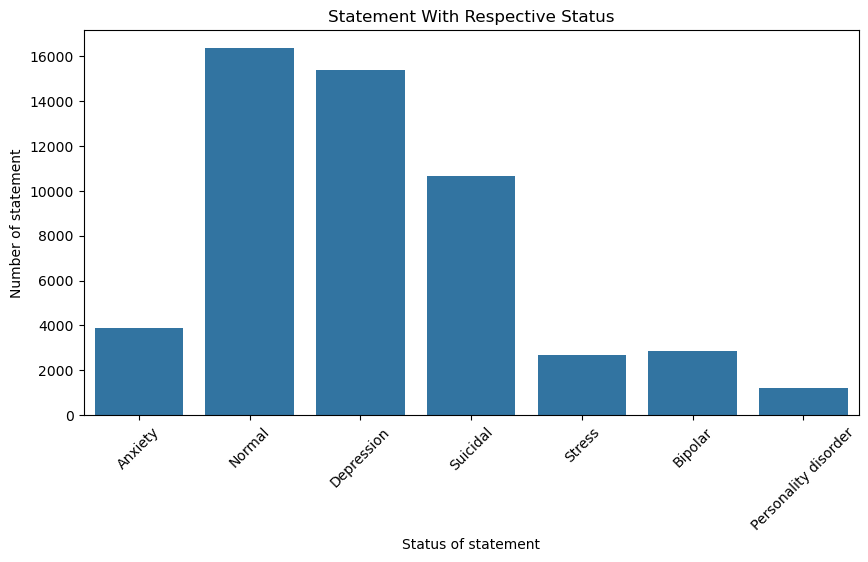

In [7]:
# Visualize the distribution of statuses with a count plot
plt.figure(figsize=(10, 5))
sns.countplot(x='status', data=df)
plt.xlabel("Status of statement")
plt.ylabel("Number of statement")
plt.title("Statement With Respective Status")
plt.xticks(rotation=45)
plt.show()

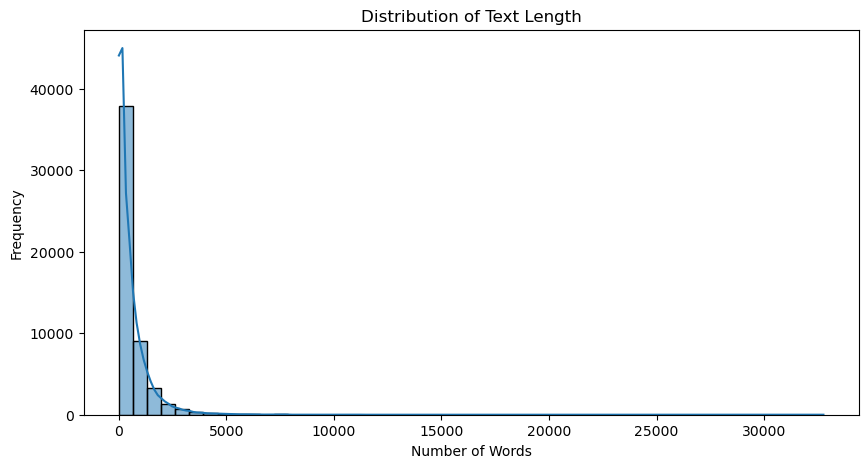

In [8]:
#Distribution of Text Length 

df['text_length'] = df['statement'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

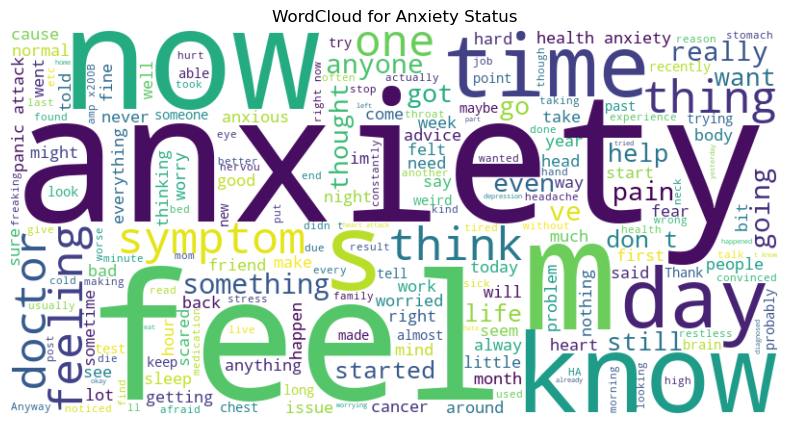

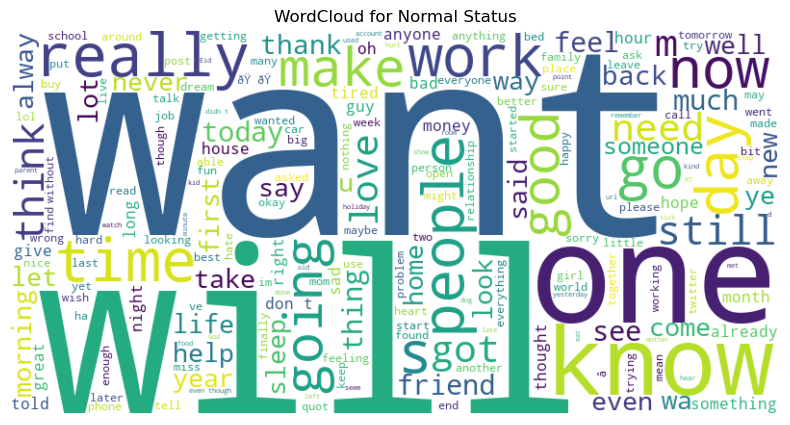

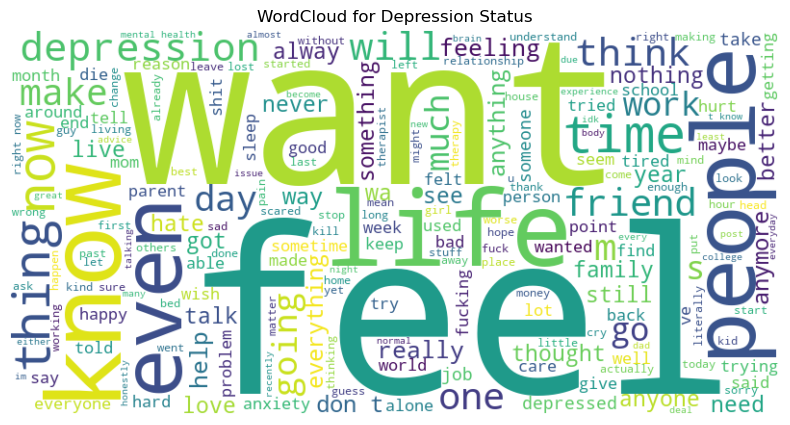

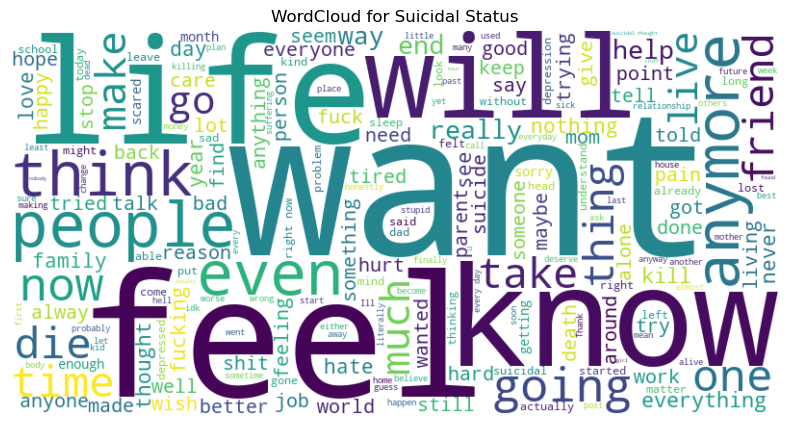

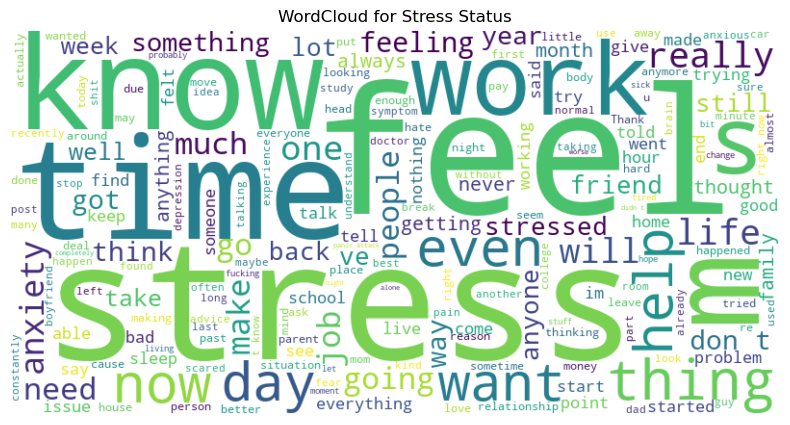

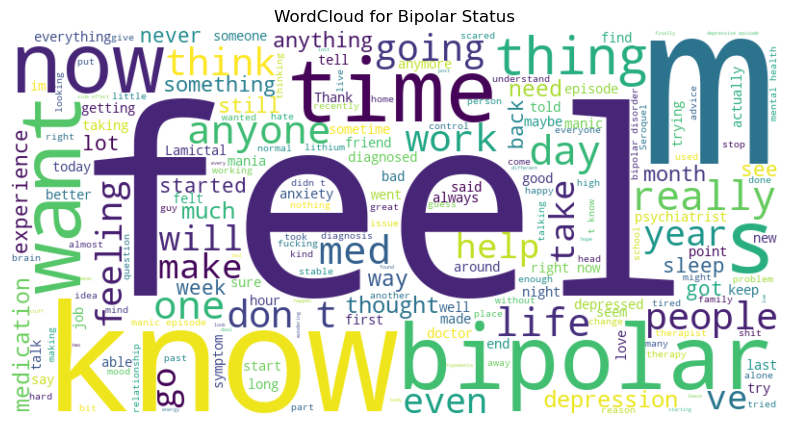

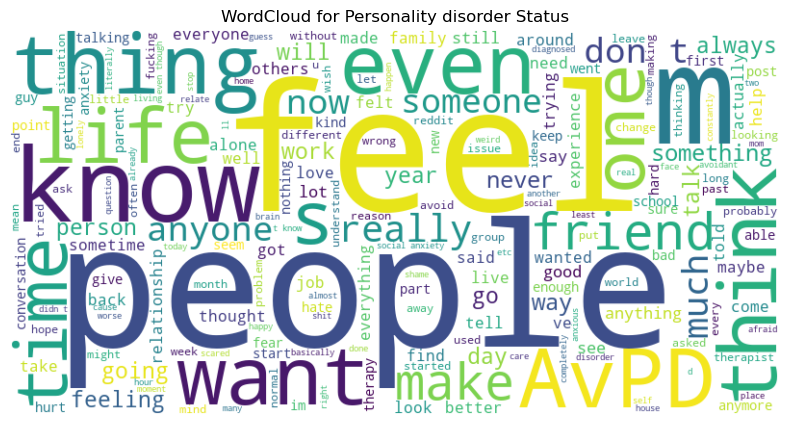

In [9]:
# Generate WordClouds for Each Status
from wordcloud import WordCloud

# Define the statuses for which you want to create the wordclouds
statuses = ['Anxiety','Normal','Depression','Suicidal','Stress' ,'Bipolar','Personality disorder']

for status in statuses:
    # Filter the dataframe for the current status and combine all text entries into a single string
    status_text = " ".join(df[df['status'] == status]['statement'].dropna().astype(str))
    
    # Only generate and plot the wordcloud if there is text data for the status
    if status_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(status_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for {status} Status")
        plt.show()

# Data Cleaning and Resampling

In [10]:
from sklearn.utils import resample

In [11]:
# Display data information before cleaning
print("Data Information Before Cleaning:")
print(df.info())
print("\nMissing values in each column:")
print(df.isna().sum())

Data Information Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   statement    52681 non-null  object
 1   status       53043 non-null  object
 2   text_length  53043 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None

Missing values in each column:
statement      362
status           0
text_length      0
dtype: int64


In [12]:
# Drop rows with missing values
df.dropna(inplace=True)
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (52681, 3)


In [13]:
# Check the distribution of 'status' before resampling
print("\nStatus Value Counts before resampling:")
print(df['status'].value_counts())



Status Value Counts before resampling:
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: status, dtype: int64


In [14]:
# Define a function to resample the dataset for class balancing
def resample_data(data):
    # Find the maximum count among all statuses
    max_count = data['status'].value_counts().max()
    
    # Initialize an empty DataFrame to store resampled data
    resampled_data = pd.DataFrame()
    
    # Loop through each unique status and resample if needed
    for status in data['status'].unique():
        subset = data[data['status'] == status]
        if len(subset) < max_count:
            # Resample with replacement to match the maximum count
            subset_resampled = resample(subset, replace=True, n_samples=max_count, random_state=42)
            resampled_data = pd.concat([resampled_data, subset_resampled])
        else:
            resampled_data = pd.concat([resampled_data, subset])
    
    return resampled_data


In [15]:
# Apply the resampling function to balance the classes
df = resample_data(df)

In [16]:
# Verify the resampled data
print("\nStatus Value Counts after resampling:")
print(df['status'].value_counts())
print("\nShape of resampled data:", df.shape)



Status Value Counts after resampling:
Anxiety                 16343
Normal                  16343
Depression              16343
Suicidal                16343
Stress                  16343
Bipolar                 16343
Personality disorder    16343
Name: status, dtype: int64

Shape of resampled data: (114401, 3)


In [17]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates_count)


Number of duplicate rows: 70887


# Text Preprocessing, Data Splitting, and TF-IDF Vectorization

In [18]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaiki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaiki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [21]:
# Define a function to preprocess text data using lemmatization
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert text to lowercase
    text = re.sub('[^a-zA-Z0-9\s]', '', text.lower())
    # Apply lemmatization to each word
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply the preprocessing function to the 'statement' column
df['statement'] = df['statement'].apply(preprocess_text)

In [22]:
# Split the data into features and labels
X = df['statement']
y = df['status']

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Print the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (91520,) (91520,)
Testing set shape: (22881,) (22881,)


In [25]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

In [26]:
# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Print the shapes of the vectorized data
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF testing data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (91520, 60335)
TF-IDF testing data shape: (22881, 60335)


# Model Training with Random Forest

In [27]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize
import joblib

In [28]:
# Hyperparameter Tuning with Successive Halving
param_dist = {
    'max_depth':          [None, 30, 50],
    'min_samples_split':  [2, 5],
    'min_samples_leaf':   [1, 2],
    'max_features':       ['sqrt', 0.5],
    'bootstrap':          [True]
}

In [29]:
halving_cv = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    resource='n_estimators',
    min_resources=100,
    max_resources=500,
    factor=3,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)


In [30]:
halving_cv.fit(X_train_tfidf, y_train)
best_rf = halving_cv.best_estimator_

print("Best params:",           halving_cv.best_params_)
print("Best n_estimators:",     halving_cv.best_params_['n_estimators'])
print("Test Accuracy: {:.2f}%".format(
    accuracy_score(y_test, best_rf.predict(X_test_tfidf)) * 100
))


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 100
max_resources_: 500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 100
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 2
n_resources: 300
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'n_estimators': 300}
Best n_estimators: 300
Test Accuracy: 95.48%


In [31]:
# Predictions & Metrics
y_pred  = best_rf.predict(X_test_tfidf)
y_proba = best_rf.predict_proba(X_test_tfidf)
classes = best_rf.classes_

In [32]:
# Classification Report
print("\nClassification Report (4 d.p.):")
print(classification_report(
    y_test, y_pred,
    digits=4,
    target_names=classes.astype(str)
))


Classification Report (4 d.p.):
                      precision    recall  f1-score   support

             Anxiety     0.9904    0.9907    0.9905      3331
             Bipolar     0.9965    0.9931    0.9948      3193
          Depression     0.9006    0.8505    0.8748      3312
              Normal     0.9150    0.9580    0.9360      3260
Personality disorder     1.0000    1.0000    1.0000      3186
              Stress     0.9899    0.9966    0.9933      3259
            Suicidal     0.8934    0.8985    0.8960      3340

            accuracy                         0.9548     22881
           macro avg     0.9551    0.9554    0.9551     22881
        weighted avg     0.9546    0.9548    0.9545     22881



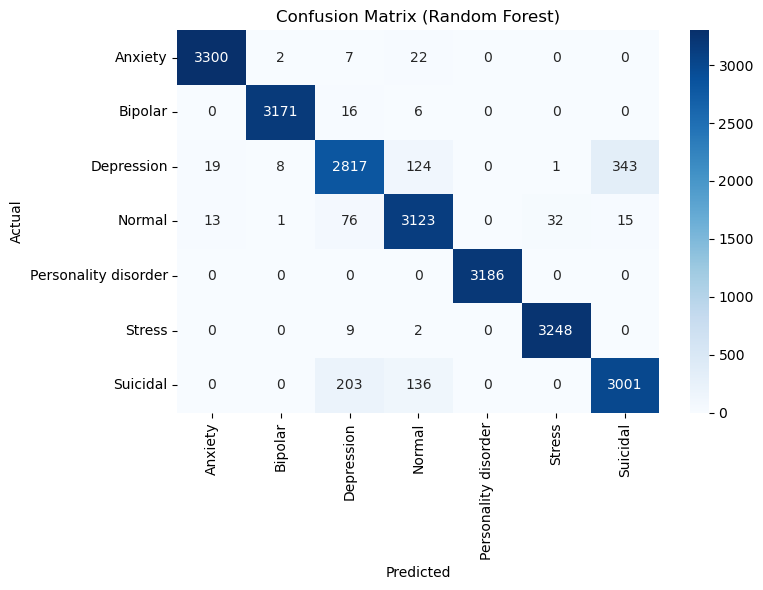

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [34]:
# Binarize for one-vs-rest curves
y_test_bin = label_binarize(y_test, classes=classes)
n_classes  = y_test_bin.shape[1]

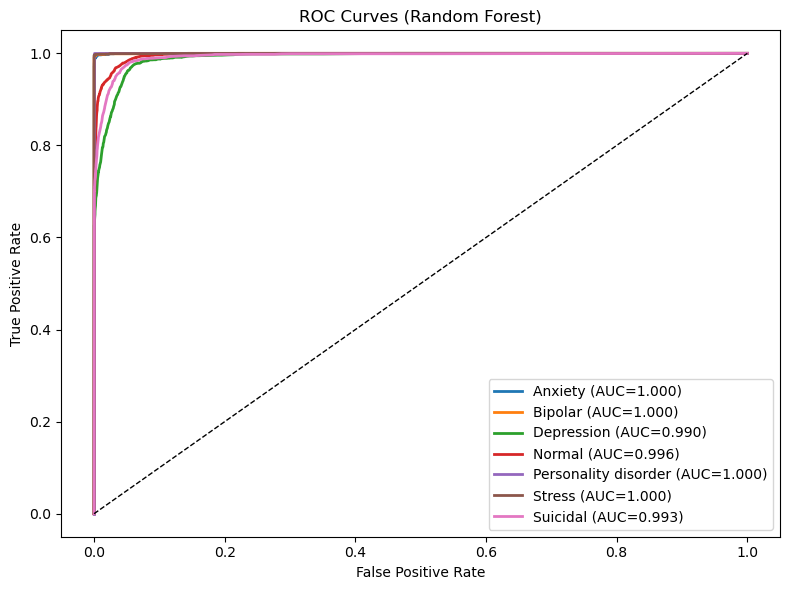

In [35]:
# ROC Curves 
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curves (Random Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


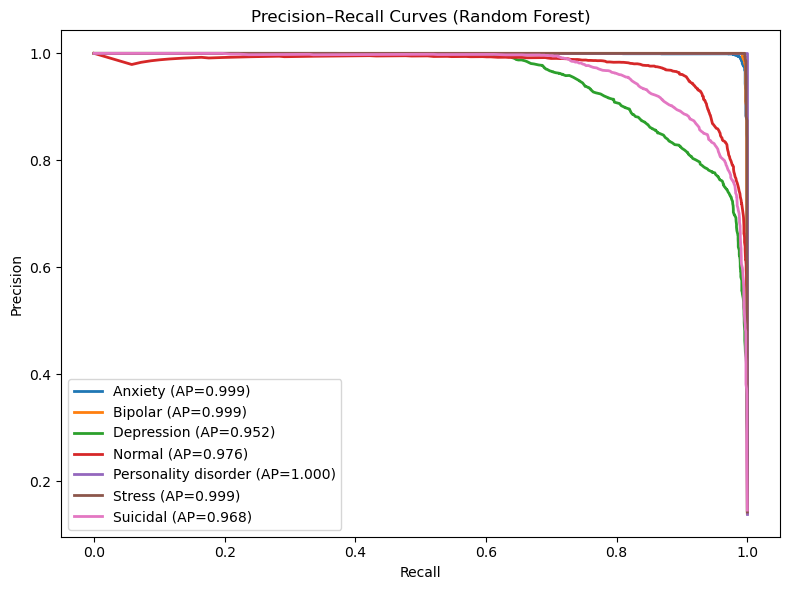

In [36]:
# Precision–Recall Curves (One-vs-Rest)
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(rec, prec, lw=2, label=f"{cls} (AP={ap:.3f})")

plt.title("Precision–Recall Curves (Random Forest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


# Model Training with Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
# Define a small search space *excluding* n_estimators so it can be the "resource"
param_dist_et = {
    'max_depth':         [None, 30, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf':  [1, 2],
    'max_features':      ['sqrt', 0.5],
    'bootstrap':         [True]
}

In [39]:
# Set up the halving search over n_estimators
halving_et = HalvingRandomSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_et,
    resource='n_estimators',    
    min_resources=50,           
    max_resources=450,          
    factor=3,                   
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1
)



In [40]:
# Run the search
halving_et.fit(X_train_tfidf, y_train)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 450
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 50
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 150
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 450
Fitting 3 folds for each of 1 candidates, totalling 3 fits


HalvingRandomSearchCV(cv=3,
                      estimator=ExtraTreesClassifier(n_jobs=-1,
                                                     random_state=42),
                      max_resources=450, min_resources=50, n_jobs=-1,
                      param_distributions={'bootstrap': [True],
                                           'max_depth': [None, 30, 50],
                                           'max_features': ['sqrt', 0.5],
                                           'min_samples_leaf': [1, 2],
                                           'min_samples_split': [2, 5]},
                      random_state=42, resource='n_estimators',
                      scoring='accuracy', verbose=1)

In [41]:
# Grab the best model and evaluate
best_et = halving_et.best_estimator_
print("Best params:",           halving_et.best_params_)
print("Best n_estimators:",     halving_et.best_params_['n_estimators'])
print("Test Accuracy: {:.2f}%".format(
    accuracy_score(y_test, best_et.predict(X_test_tfidf)) * 100
))

Best params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'n_estimators': 450}
Best n_estimators: 450
Test Accuracy: 95.56%


In [42]:
#Get predictions & predicted probabilities
y_pred  = best_et.predict(X_test_tfidf)
y_proba = best_et.predict_proba(X_test_tfidf)
classes = best_et.classes_


In [43]:
# Classification Report 
print("Classification Report :")
print(classification_report(
    y_test, y_pred,
    digits=4,
    target_names=classes.astype(str)
))

Classification Report :
                      precision    recall  f1-score   support

             Anxiety     0.9895    0.9910    0.9903      3331
             Bipolar     0.9959    0.9937    0.9948      3193
          Depression     0.8985    0.8496    0.8734      3312
              Normal     0.9255    0.9564    0.9407      3260
Personality disorder     1.0000    1.0000    1.0000      3186
              Stress     0.9945    0.9960    0.9952      3259
            Suicidal     0.8879    0.9060    0.8969      3340

            accuracy                         0.9556     22881
           macro avg     0.9560    0.9561    0.9559     22881
        weighted avg     0.9554    0.9556    0.9553     22881



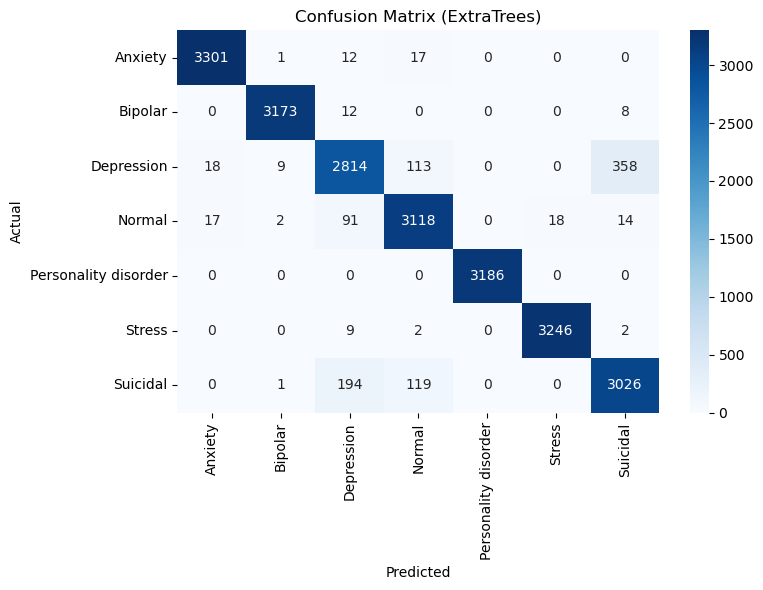

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (ExtraTrees)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [45]:
# Binarize labels for one-vs-rest
y_test_bin = label_binarize(y_test, classes=classes)

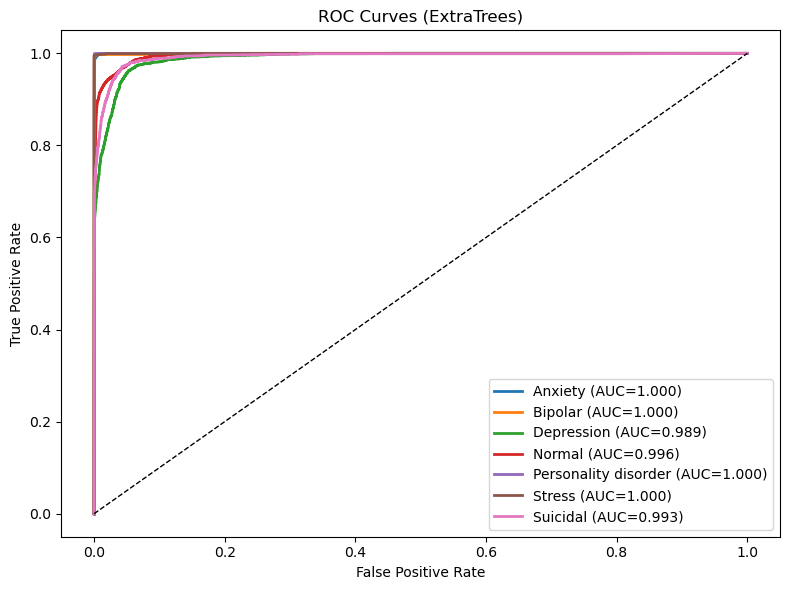

In [46]:
# ROC Curves 
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curves (ExtraTrees)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

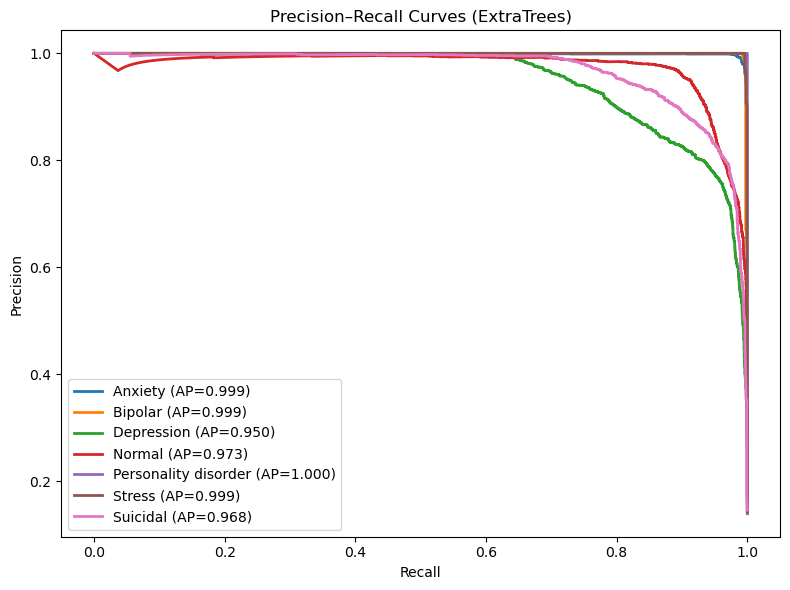

In [47]:
#  Precision–Recall Curves 
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(rec, prec, lw=2, label=f"{cls} (AP={ap:.3f})")

plt.title("Precision–Recall Curves (ExtraTrees)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Model Training with XGBoost

In [48]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize

In [49]:
# Encode the labels to numeric values
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [50]:
#Halving hyperparameter search over n_estimators + core XGB params
param_dist = {
    'max_depth':        [3, 6, 9],
    'learning_rate':    [0.01, 0.1, 0.2],
    'subsample':        [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

halving_xgb = HalvingRandomSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_jobs=-1
    ),
    param_distributions=param_dist,
    resource='n_estimators',
    min_resources=50,
    max_resources=300,
    factor=3,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [51]:
# fit on the full training set
halving_xgb.fit(X_train_tfidf, y_train_enc)

best_xgb = halving_xgb.best_estimator_
print("Best params:",           halving_xgb.best_params_)
print("Best n_estimators:",     halving_xgb.best_params_['n_estimators'])


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 50
max_resources_: 300
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 50
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 1
n_candidates: 2
n_resources: 150
Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\kaiki\Documents\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'subsample': 0.9, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'n_estimators': 150}
Best n_estimators: 150


In [52]:
# Predict & evaluate
y_pred_enc = best_xgb.predict(X_test_tfidf)
y_proba    = best_xgb.predict_proba(X_test_tfidf)
y_pred     = le.inverse_transform(y_pred_enc)
classes    = le.classes_


In [53]:
# 4-decimal classification report
print("\nClassification Report (XGBoost):")
print(classification_report(
    y_test, y_pred,
    digits=4,
    target_names=classes
))



Classification Report (XGBoost):
                      precision    recall  f1-score   support

             Anxiety     0.9588    0.9652    0.9620      3331
             Bipolar     0.9819    0.9674    0.9746      3193
          Depression     0.8532    0.7316    0.7877      3312
              Normal     0.8729    0.9227    0.8971      3260
Personality disorder     0.9775    0.9959    0.9866      3186
              Stress     0.9224    0.9672    0.9443      3259
            Suicidal     0.8092    0.8317    0.8203      3340

            accuracy                         0.9107     22881
           macro avg     0.9109    0.9117    0.9104     22881
        weighted avg     0.9101    0.9107    0.9095     22881



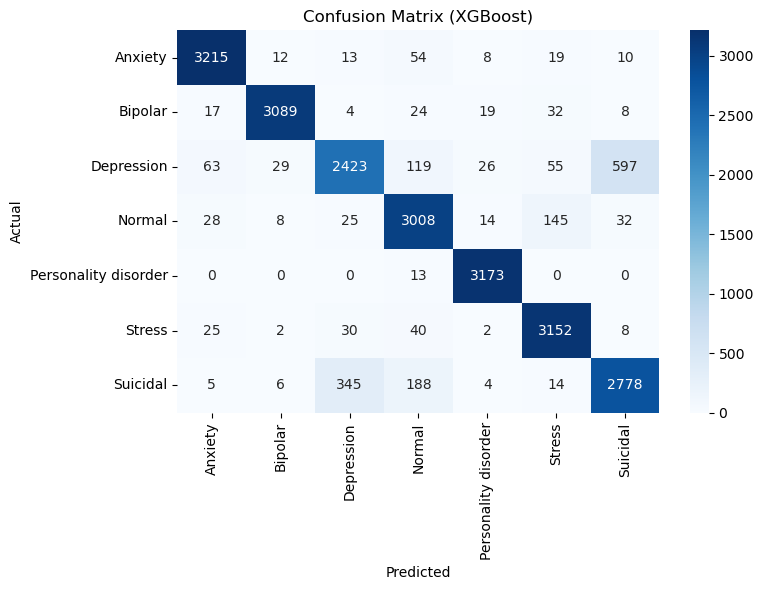

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [55]:
# binarize for one-vs-rest curves
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(classes)))

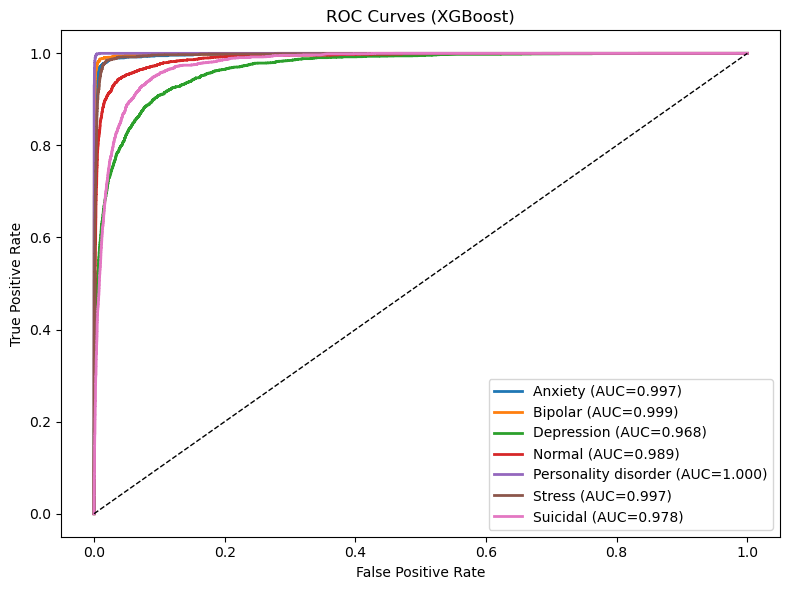

In [56]:
# ROC Curves
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_proba[:,i])
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.title("ROC Curves (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

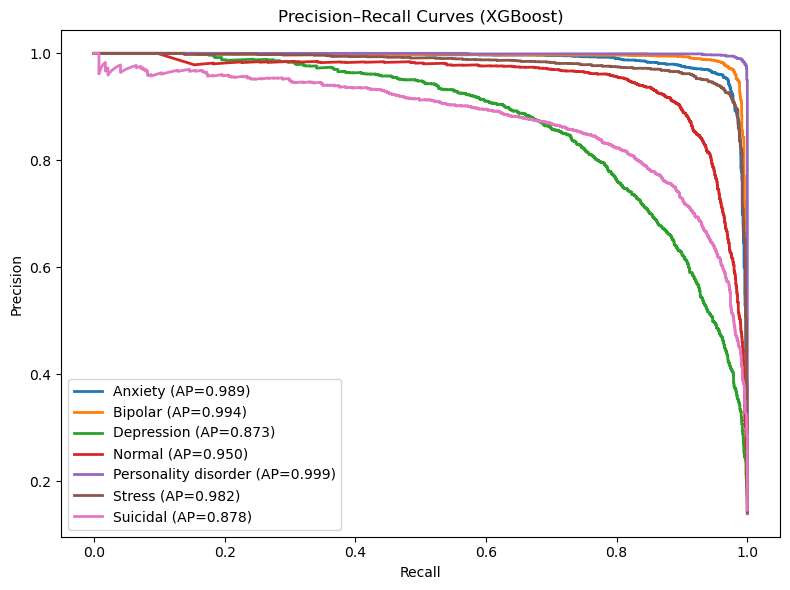

In [57]:
# Precision–Recall
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_test_bin[:,i], y_proba[:,i])
    ap = average_precision_score(y_test_bin[:,i], y_proba[:,i])
    plt.plot(rec, prec, lw=2, label=f"{cls} (AP={ap:.3f})")
plt.title("Precision–Recall Curves (XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Model Training with Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [59]:
# Define a grid of parameters to search through
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['lbfgs'],  
    'max_iter': [1000]
}


In [60]:
# Create a LogisticRegression instance with a fixed random state for reproducibility
lr_model = LogisticRegression(random_state=42)

In [61]:
# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(lr_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


In [62]:
# Fit the grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\kaiki\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [63]:
# Get the best estimator from the grid search
best_lr = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [64]:
# Make predictions on the test set using the best estimator
y_pred_lr = best_lr.predict(X_test_tfidf)

In [65]:
# 4‐decimal classification report
print("Classification Report:")
print(classification_report(
    y_test, y_pred_lr,
    digits=4,
    target_names=classes.astype(str)
))

Classification Report:
                      precision    recall  f1-score   support

             Anxiety     0.9695    0.9919    0.9806      3331
             Bipolar     0.9861    0.9962    0.9911      3193
          Depression     0.8741    0.8303    0.8517      3312
              Normal     0.9568    0.9113    0.9335      3260
Personality disorder     0.9888    1.0000    0.9944      3186
              Stress     0.9576    0.9975    0.9772      3259
            Suicidal     0.8686    0.8787    0.8736      3340

            accuracy                         0.9431     22881
           macro avg     0.9431    0.9437    0.9432     22881
        weighted avg     0.9425    0.9431    0.9425     22881



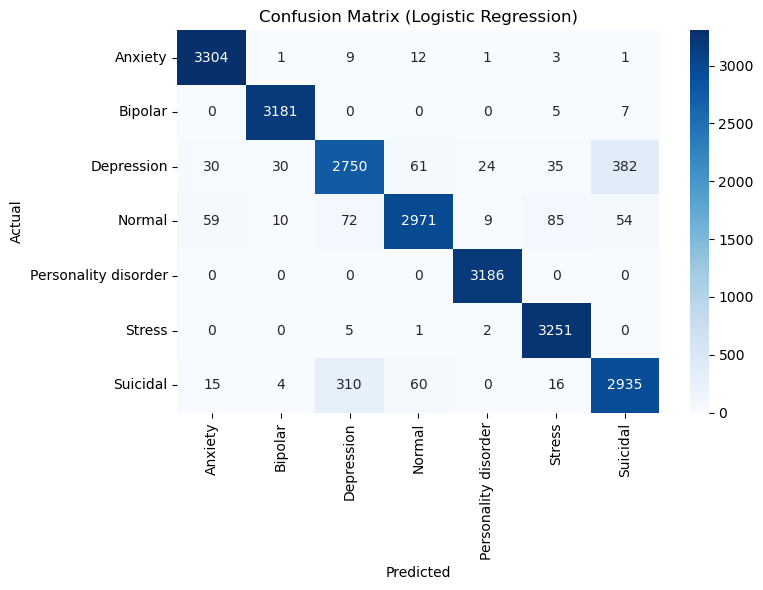

In [66]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_lr, labels=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [67]:
# Prepare one‐vs‐rest binarized labels
y_test_bin = label_binarize(y_test, classes=classes)

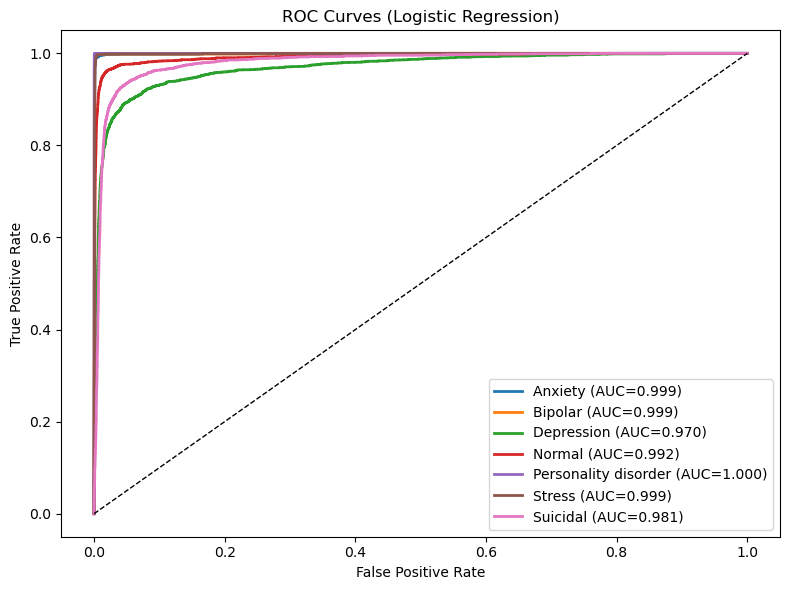

In [68]:
y_proba_lr = best_lr.predict_proba(X_test_tfidf)
classes    = best_lr.classes_
# ROC curves (one‐vs‐rest)
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curves (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

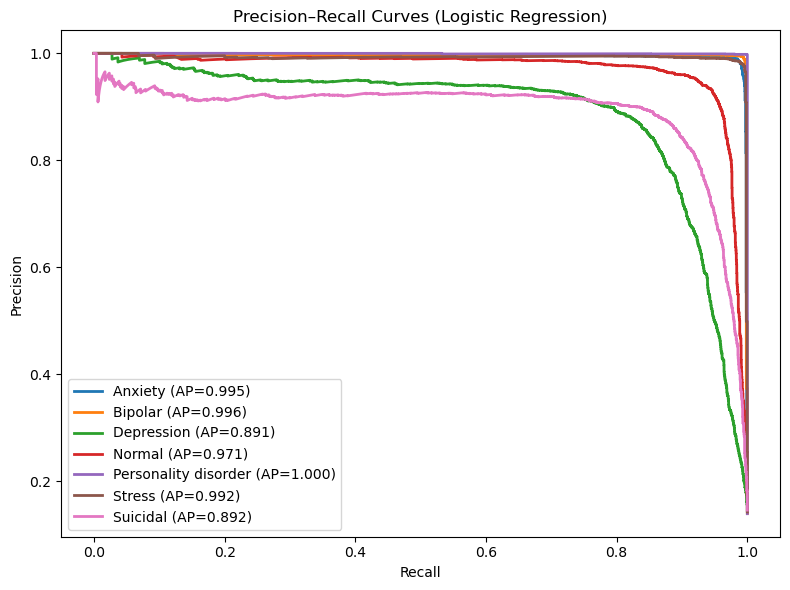

In [69]:
# Precision–Recall curves (one‐vs‐rest)
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_proba_lr[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba_lr[:, i])
    plt.plot(rec, prec, lw=2, label=f"{cls} (AP={ap:.3f})")

plt.title("Precision–Recall Curves (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()